In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from stocker import Stocker
import warnings 
warnings.filterwarnings('ignore')

#grabbing Disney Stock with Stocker
disney = Stocker('DIS')

#putting the stock history into a variable using the stock attribute of stocker
disney_history = disney.stock

print(disney_history.head())

DIS Stocker Initialized. Data covers 1962-01-02 to 2018-02-28.
        Date   Open   High    Low  Close  Volume  Ex-Dividend  Split Ratio  \
0 1962-01-02  37.25  38.50  37.25  37.25  2098.0          0.0          1.0   
1 1962-01-03  37.25  37.88  37.25  37.75  1998.0          0.0          1.0   
2 1962-01-04  37.75  37.88  37.50  37.75  2397.0          0.0          1.0   
3 1962-01-05  37.75  38.00  37.63  37.88  2397.0          0.0          1.0   
4 1962-01-08  37.88  38.38  37.00  37.75  3197.0          0.0          1.0   

   Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume         ds  \
0   0.141259   0.145999  0.141259    0.141259    408858.24 1962-01-02   
1   0.141259   0.143648  0.141259    0.143155    389370.24 1962-01-03   
2   0.143155   0.143648  0.142207    0.143155    467127.36 1962-01-04   
3   0.143155   0.144103  0.142700    0.143648    467127.36 1962-01-05   
4   0.143648   0.145544  0.140311    0.143155    623031.36 1962-01-08   

          y  Daily Change  
0

Maximum Adj. Close = 118.26 on 2015-08-04.
Minimum Adj. Close = 0.08 on 1962-10-26.
Current Adj. Close = 103.16 on 2018-02-28.



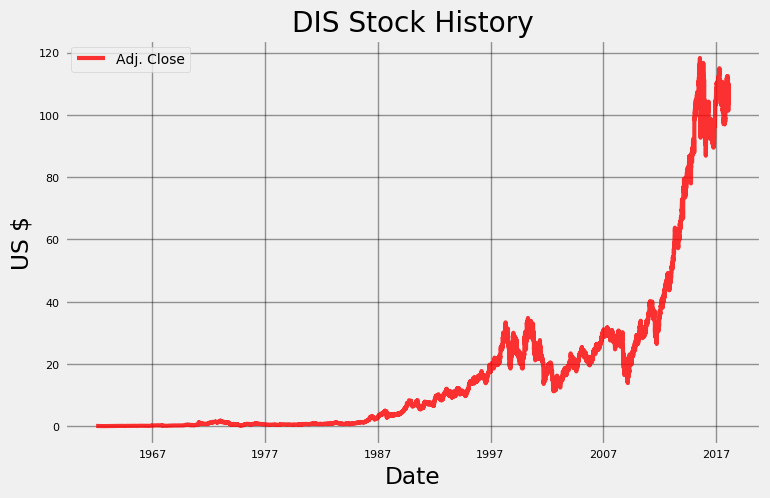

In [4]:
#plotting all time using plot_stock()
disney.plot_stock()


### Let's look at changepoints and price change with Google search traffic overlaid to see if we can find any trends. Some of Disney's most popular products in recent years are based upon the Marvel comic books IP, which they acquired in 2009. Let's see how search traffic for "disney marvel" looks overlaid with the stock changes. 


 Top Related Queries: 

                    query  value
0  disney infinity marvel    100
1                infinity     99
2         disney infinity     95
3         marvel infinity     95
4           marvel movies     39

 Rising Related Queries: 

                                      query   value
0                      marvel battlegrounds  187900
1      disney infinity marvel battlegrounds  183000
2  disney infinity 3.0 marvel battlegrounds  121900
3                          marvel civil war  105800
4            disney infinity 3.0 characters   94000


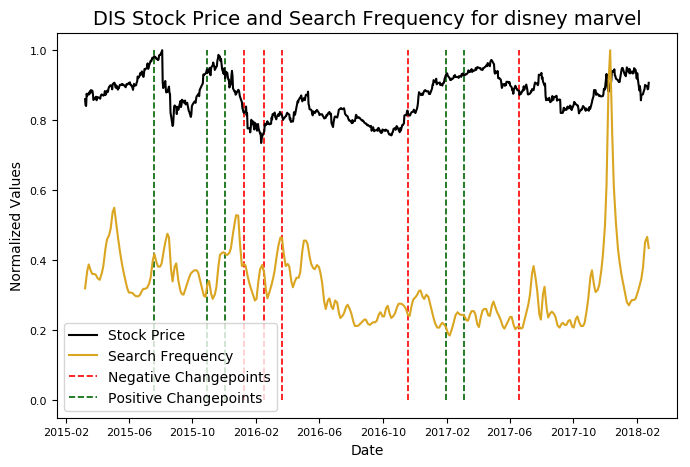

In [6]:
#changepoints with search traffic 
#Has interest in Marvel done anything to the stock price? 
disney.changepoint_date_analysis(search= 'disney marvel')

### What about Star Wars? Disney purchased the IP rights to LucasFilm properties at the end of Oct. 2012. 



 Top Related Queries: 

                          query  value
0  star wars world disney world    100
1            infinity star wars     98
2     star wars disney infinity     98
3                      infinity     96
4     disney infinity star wars     96

 Rising Related Queries: 

                                         query   value
0                          star wars rogue one  115350
1                                    rogue one  114350
2          disney world star wars land opening   86400
3  disney infinity star wars the force awakens   77200
4          star wars disney world opening date   55750


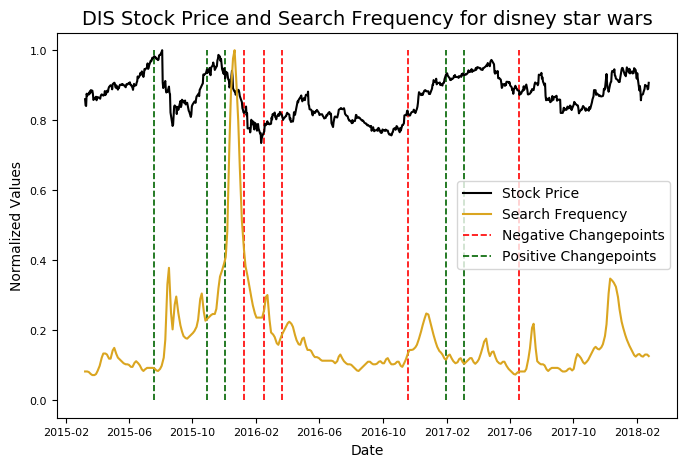

In [7]:

disney.changepoint_date_analysis(search= 'disney star wars')

### From these two searches we can see that 'disney infinity' is a popular search term. Disney Infinity is a sandbox style videogame released in 2013. The franchise was retired in 2016. Let's dig into this. 


 Top Related Queries: 

                        query  value
0                infinity 3.0    100
1         infinity disney 3.0     96
2                infinity 2.0     45
3         disney infinity 2.0     45
4  disney infinity characters     24

 Rising Related Queries: 

                              query   value
0     disney infinity force awakens  113200
1       disney infinity toy box 3.0  110850
2                   lego dimensions   94200
3  disney infinity 3.0 starter pack   82150
4      disney infinity 3.0 xbox one   80750


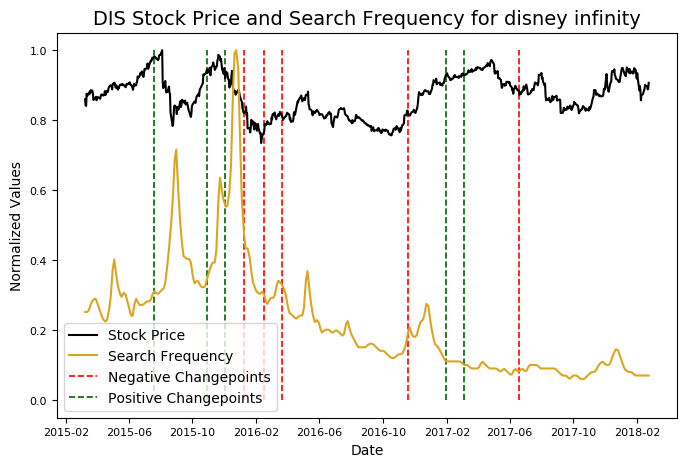

In [8]:
#Checking Disney Infinity search traffic vs stock price
disney.changepoint_date_analysis(search= 'disney infinity')

### We can see a big bump in search traffic right before three major negative changepoints. What was going on at the end of 2015? Star Wars: The Force Awakens was released to much hype and acclaim. It would make sense that searches for the Disney Infinity videogame, which includes many characters from Star Wars, would coincide with this. This basically matches the search bump for searching Star Wars itself. 

### Then why did Disney discontinue the Infinity videogame? Nintendo's Amiibo series was released in June 2014 and quickly became the dominant player in the area. Let's see how searches for the Amiibo coincided with changes in the Disney stock. 


 Top Related Queries: 

             query  value
0     amiibo mario    100
1     amiibo zelda     78
2  nintendo amiibo     72
3         nintendo     71
4      link amiibo     56

 Rising Related Queries: 

                             query   value
0               breath of the wild  410800
1        breath of the wild amiibo  408650
2         zelda breath of the wild  186050
3  zelda amiibo breath of the wild  181700
4                      botw amiibo  163050


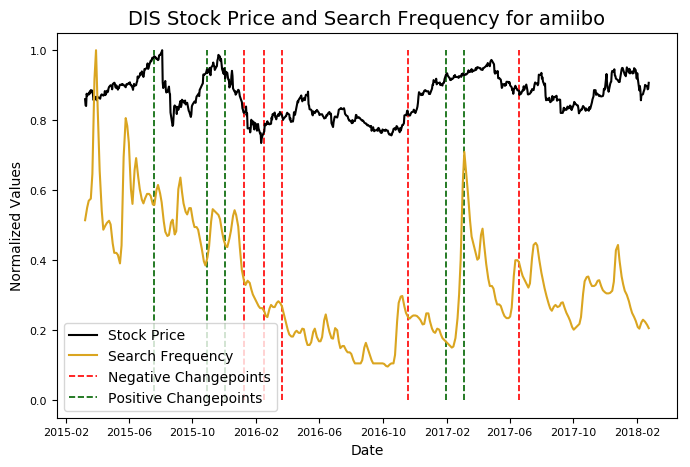

In [11]:
disney.changepoint_date_analysis(search= 'amiibo')

### The search traffic for amiibo clearly went up and then declined after the dip at the end of 2015, which kept the normalized price down for the majority of 2016. The stock has since recovered, starting with the pop near the beginning of 2017. Remember, Disney discontinued the Infinity Franchise in May 2016. 

### With a massive media conglomerate like Disney, it wouldn't be wise to make grand proclamations based on one now-discontinued video game. However, the search traffic indicates that the rise of the Nintendo Amiibo combined with the search-popularity of the Disney Infinity warrants attention in the Disney stock story. 

### But what about the future? 

Predicted Price on 2018-05-29 = $109.86


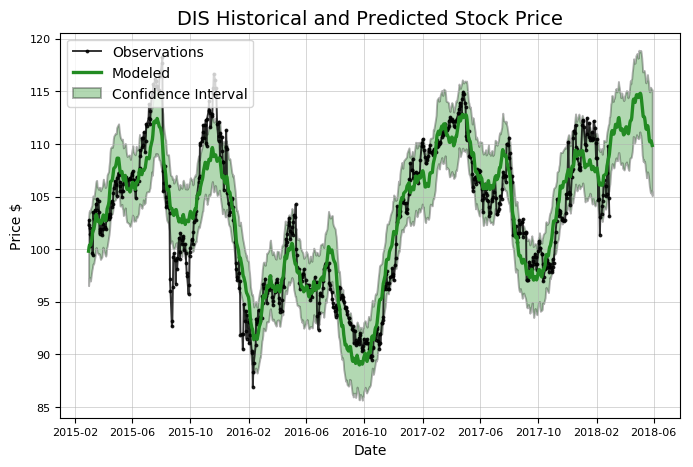


Prediction Range: 2017-02-28 to 2018-02-28.

Predicted price on 2018-02-27 = $148.56.
Actual price on    2018-02-27 = $104.87.

Average Absolute Error on Training Data = $1.84.
Average Absolute Error on Testing  Data = $23.22.

When the model predicted an increase, the price increased 52.35% of the time.
When the model predicted a  decrease, the price decreased  55.00% of the time.

The actual value was within the 80% confidence interval 29.48% of the time.


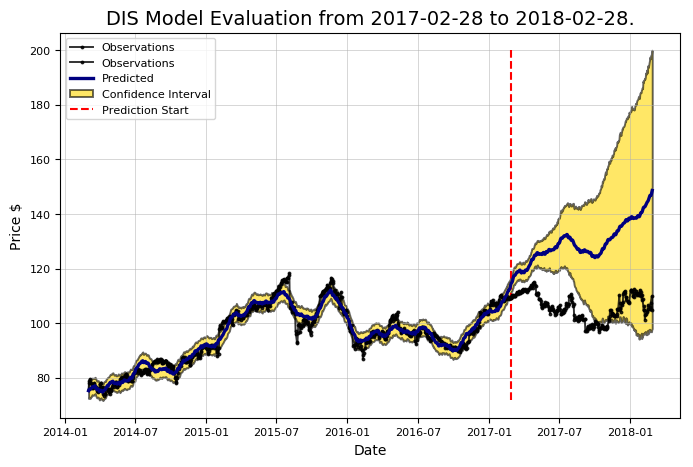

In [16]:
#Creating prophet model to predict 90 days out

model, future = disney.create_prophet_model(days=90, resample=False)

disney.evaluate_prediction()

### These results aren't very good. To try and make them better, we can evaluate our changepoint priors to help the model learn from the training set and give better predictions. 

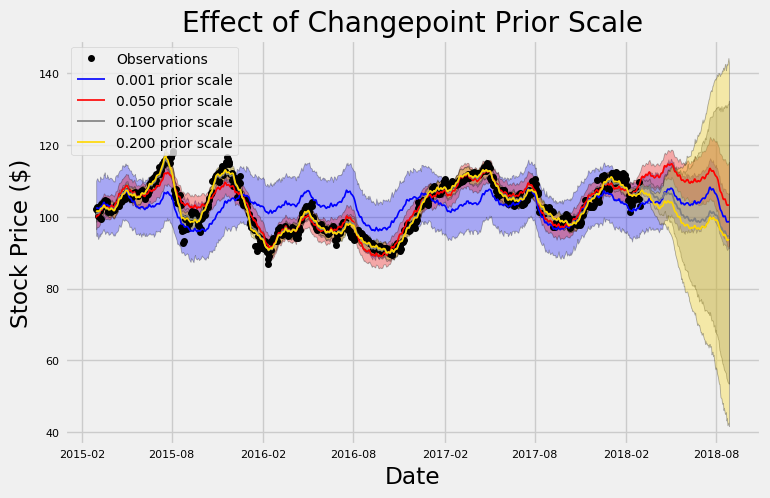

In [17]:
# changepoint priors is the list of changepoints to evaluate
disney.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 to 2017-01-03.

    cps  train_err  train_range   test_err  test_range
0  0.15   1.318351     4.454380  14.467075  107.815154
1  0.20   1.218891     4.150633   6.746116  136.545394
2  0.25   1.182470     4.032754   4.329133  159.862437
3  0.40   1.123546     3.845601   6.838574  181.650411
4  0.50   1.112111     3.809946   6.956950  206.798563
5  0.60   1.104003     3.795775   8.366779  211.536882


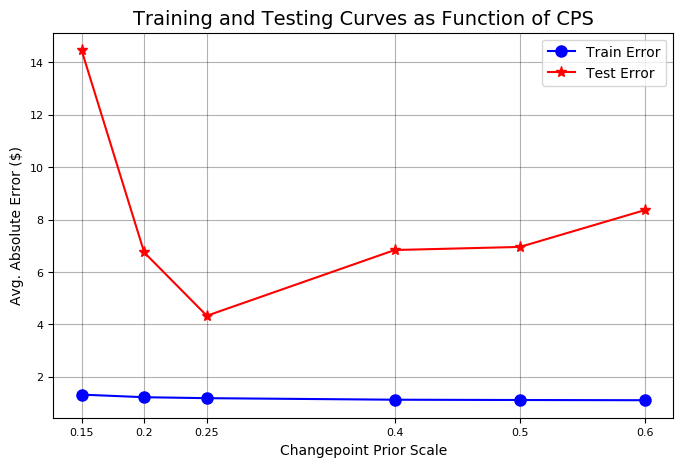

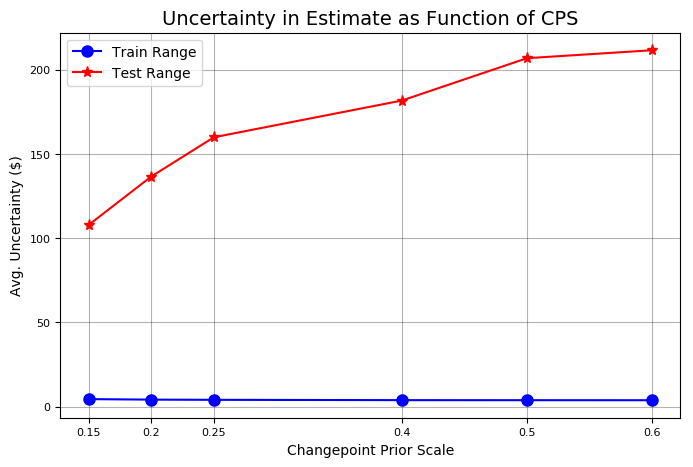

In [27]:
#Running the changepoint analysis build into stocker
disney.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

### Where did those dates come from? Since we are now in 2018, the model is breaking the data into multiple datasets. We have a training set, a validation set, and a prediction set. We need values for every set in order to create a useful model. The validation set is the data from the year 2016, so that's the dates we use here to check our changepoints. We can't use 2017 because it is our prediction set, which we are using to evaluate the model.  The training data are the two previous years of stock data 2013-2015. 

### The test range error is lowest when the changepoint prior is set to 0.15. Let's see how the model does after we change this. 

In [28]:
#Changing the changepoint prior scale to the value with the lowest test error
disney.changepoint_prior_scale = 0.15


Prediction Range: 2017-02-28 to 2018-02-28.

Predicted price on 2018-02-27 = $136.82.
Actual price on    2018-02-27 = $104.87.

Average Absolute Error on Training Data = $1.33.
Average Absolute Error on Testing  Data = $13.86.

When the model predicted an increase, the price increased 50.32% of the time.
When the model predicted a  decrease, the price decreased  50.53% of the time.

The actual value was within the 80% confidence interval 96.02% of the time.


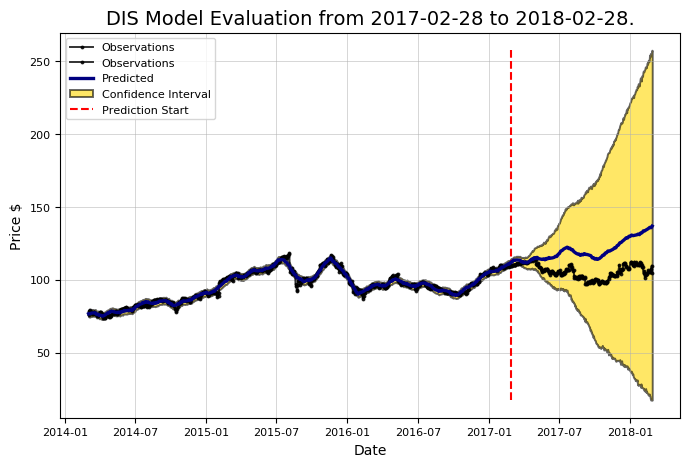

In [29]:
#Reevaluating the model
disney.evaluate_prediction()

### By changing the changepoint prior value to 0.15, we got our actual value into the 80% confidence interval 96.02% of the time vs. 29.48% before it was changed.

### We also didn't lose much in predicting increases or decreases, not that it was much better than a coin flip to begin with. In predicting increases we went from 52.35% to 50.32% and for declines 55.00% to 50.53%. 

### The average testing error declined from 23.22 to 13.86.

### What if we keep lowering the prior? 


Validation Range 2016-01-04 to 2017-01-03.

    cps  train_err  train_range   test_err  test_range
0  0.10   1.827207     6.041689  21.827059   23.560718
1  0.11   1.630390     5.427232  22.622344   47.384443
2  0.12   1.500998     5.006529  18.566225   70.317748
3  0.13   1.390006     4.661238  14.474182   88.948547
4  0.14   1.352220     4.551901  13.469105   98.783291
5  0.15   1.318351     4.444078  14.467075  112.334992


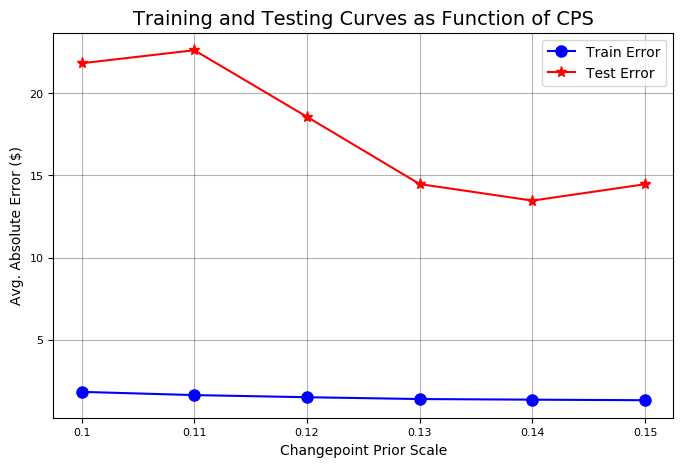

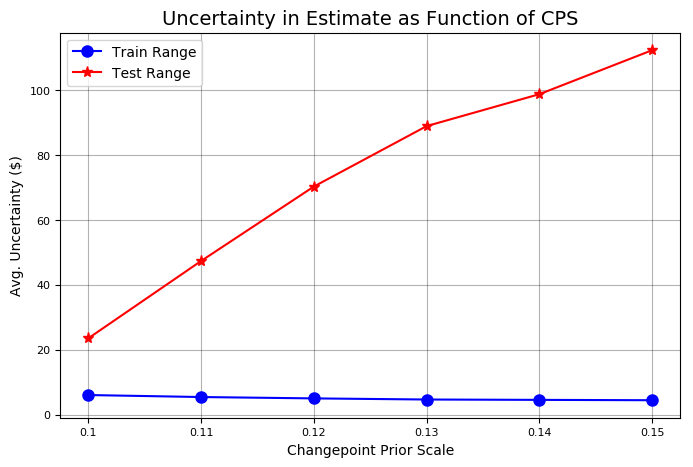

In [31]:
disney.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.10, 0.11, 0.12,0.13, 0.14, 0.15])




Prediction Range: 2017-02-28 to 2018-02-28.

Predicted price on 2018-02-27 = $142.53.
Actual price on    2018-02-27 = $104.87.

Average Absolute Error on Training Data = $1.43.
Average Absolute Error on Testing  Data = $18.08.

When the model predicted an increase, the price increased 52.80% of the time.
When the model predicted a  decrease, the price decreased  55.06% of the time.

The actual value was within the 80% confidence interval 72.51% of the time.


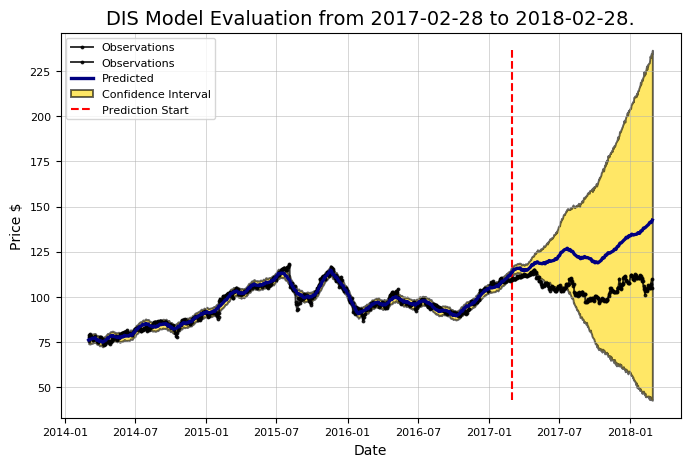

In [34]:
disney.changepoint_prior_scale = 0.1
disney.evaluate_prediction()

### So we can see here that if we set the prior = 0.1, we get some of our predictive accuracy back, while also increasing the chances that the predicted value falls within the 80% confidence level. With the prior set to 0.1, we almost get back to the predictive accuracy before changing priors ( 52.08% vs. 52.35% increases and 55% vs. 55.06% decreases), while also increasing the chances of falling into the 80% confidence level to 72.51% up from 29.48%. 

### These are not likely numbers that you would want to put money on if you were using this model as your only tool to evaluate Disney as an investment, but that doesn't mean it's not a good investment. As William Koehrsen writes in his article about using Stocker, if you were using this model for actual investing, you would need to build a new model everyday and forecast a maximum of one day in advance.  

### I think the future is bright for AI in finance and tools like Stocker are helping to pave the way, even if the predictions aren't very actionable right now. The ease of use in loading stock data and creating visualizations still make Stocker a very valuable tool in financial analysis with python.  